# Delivery Task


# Data Preprocessing

## Import Library and Load Dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pytz
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_datetime64_dtype 

# load the JSON data from file
df_raw = pd.read_json('/content/data-sample.json')

# show first 5 value
df_raw.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


It appears that the values contain a dictionary. Therefore, we should convert the dictionary to a dataframe

In [2]:
# Convert taskLocationDone dictionary to dataframe
df_raw.taskLocationDone.loc[df_raw.taskLocationDone.isnull()] = df_raw.taskLocationDone.loc[df_raw.taskLocationDone.isnull()].apply(lambda x:{'lon' : np.nan, 'lat' : np.nan})
taskLocationDone_df_raw = pd.DataFrame.from_records(df_raw.taskLocationDone)
taskLocationDone_df_raw = taskLocationDone_df_raw.add_prefix('taskLocationDone.')
taskLocationDone_df_raw.head()

,taskLocationDone.lon,taskLocationDone.lat
0,109.762910,-6.926608
1,110.033986,-7.876154
2,109.999733,-7.849777
3,110.003708,-7.710998
4,110.013887,-7.829742


In [3]:
# Convert cod dictionary to dataframe
df_raw.cod.loc[df_raw.cod.isnull()] = df_raw.cod.loc[df_raw.cod.isnull()].apply(lambda x:{'amount' : np.nan, 'received' : np.nan})
cod_df_raw = pd.DataFrame.from_records(df_raw.cod)
cod_df_raw = cod_df_raw.add_prefix('cod.')
cod_df_raw.head()

,cod.amount,cod.received
0,685000.0,True
1,53500.0,True
2,179500.0,True
3,31815.0,True
4,144562.0,True


In [4]:
# Convert userVar dictionary to dataframe
UserVar_df_raw= pd.DataFrame.from_records(df_raw.UserVar)
UserVar_df_raw = UserVar_df_raw.add_prefix('UserVar.')
UserVar_df_raw.head()

,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


In [5]:
# Drop dictionary column
df_raw1 = df_raw.drop(columns=['taskLocationDone','cod', 'UserVar'])

# Merge The Dataframe
df_raw2 = pd.concat([df_raw1, taskLocationDone_df_raw, cod_df_raw, UserVar_df_raw], axis=1)
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8334 non-null   object 
 1   taskAssignedTo                 8333 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   flow                           8334 non-null   object 
 5   taskId                         8334 non-null   object 
 6   taskLocationDone.lon           7566 non-null   float64
 7   taskLocationDone.lat           7566 non-null   float64
 8   cod.amount                     2358 non-null   float64
 9   cod.received                   2358 non-null   object 
 10  UserVar.branch_dest            8334 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.receiver_city          8282 non-null   o

In [6]:
# reorder the dataframe
new_order = ['taskId', 'taskCreatedTime', 'taskCompletedTime', 'taskAssignedTo', 'taskLocationDone.lon',
             'taskLocationDone.lat', 'taskStatus', 'flow', 'cod.amount', 'cod.received', 'UserVar.taskStatus',
             'UserVar.taskStatusLabel', 'UserVar.taskDetailStatus', 'UserVar.taskDetailStatusLabel',
             'UserVar.branch_origin', 'UserVar.branch_dest', 'UserVar.receiver_city', 'UserVar.weight']
df_raw_ord = df_raw2.reindex(columns=new_order)
df_raw_ord.head()

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
0,4fe3b237c832ca4841a2,2022-11-01 20:17:26 +0700,2022-11-01 20:46:30 +0700,pacifiedLion0,109.762910,-6.926608,done,Delivery,685000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,SRG,"BATANG ,KAB BATANG",13
1,08a4da25256affae8446,2022-11-01 08:41:07 +0700,2022-11-01 12:33:48 +0700,peacefulTacos6,110.033986,-7.876154,done,Delivery,53500.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,"PURWODADI,PURWOREJO",1.3
2,2ff0dc469826158b7684,2022-11-01 08:41:07 +0700,2022-11-01 13:41:57 +0700,peacefulTacos6,109.999733,-7.849777,done,Delivery,179500.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,"PURWODADI,PURWOREJO",3
3,331c172c2b383f774328,2022-11-01 08:41:07 +0700,2022-11-01 18:18:19 +0700,peacefulTacos6,110.003708,-7.710998,done,Delivery,31815.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,"PURWODADI,PURWOREJO",0.625
4,a9d53fa96c80baee8b23,2022-11-01 08:41:07 +0700,2022-11-01 10:51:49 +0700,peacefulTacos6,110.013887,-7.829742,done,Delivery,144562.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,"BAGELEN,PURWOREJO",3


## Data Cleaning & Data Wrangling

In [7]:
# get the DataFrame info
df_raw_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskId                         8334 non-null   object 
 1   taskCreatedTime                8334 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskAssignedTo                 8333 non-null   object 
 4   taskLocationDone.lon           7566 non-null   float64
 5   taskLocationDone.lat           7566 non-null   float64
 6   taskStatus                     8334 non-null   object 
 7   flow                           8334 non-null   object 
 8   cod.amount                     2358 non-null   float64
 9   cod.received                   2358 non-null   object 
 10  UserVar.taskStatus             7572 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.taskDetailStatus       7572 non-null   o

In [8]:
# Check the Missing Value
df_raw_ord.isna().sum()

taskId                              0
taskCreatedTime                     0
taskCompletedTime                 768
taskAssignedTo                      1
taskLocationDone.lon              768
taskLocationDone.lat              768
taskStatus                          0
flow                                0
cod.amount                       5976
cod.received                     5976
UserVar.taskStatus                762
UserVar.taskStatusLabel           762
UserVar.taskDetailStatus          762
UserVar.taskDetailStatusLabel     762
UserVar.branch_origin             293
UserVar.branch_dest                 0
UserVar.receiver_city              52
UserVar.weight                      0
dtype: int64

It appears that there are several fields with missing values, including:
*   taskCompletedTime
*   taskAssignedTo
*   taskLocationDone.lon
*   taskLocationDone.lat
*   cod.amount
*   cod.received
*   UserVar.taskStatus
*   UserVar.taskStatusLabel
*   UserVar.taskDetailStatus
*   UserVar.taskDetailStatusLabel
*   UserVar.branch_origin


In [9]:
# Check missing value in taskAssignedTo
df_raw_ord[df_raw_ord.taskAssignedTo.isnull()]

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
6907,464800bc62dd3384dfc5,2022-11-09 09:17:47 +0700,NaN,NaN,NaN,NaN,ongoing,Delivery,NaN,NaN,NaN,NaN,NaN,NaN,CGK,TSM,"CIAMIS , CIAMIS",1


It is unclear why some of the taskAssignedTo values are missing for this task. Perhaps we should investigate whether there are any other tasks with the same taskCreatedTime value to see if there are any similarities.

In [10]:
df_raw_ord[df_raw_ord['taskCreatedTime'] == '2022-11-09 09:17:47+07:00']

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight


We have identified only one task with a taskCreatedTime that matches the missing taskAssignedTo values. However, as we do not have any information explaining why these values are missing, it may be best to drop the task from consideration.

In [11]:
# Drop taskAssignedTo missing values
df_raw_ord1 = df_raw_ord.dropna(subset=['taskAssignedTo'])
df_raw_ord1 = df_raw_ord1.reset_index(drop=True)

df_raw_ord1.isna().sum()

taskId                              0
taskCreatedTime                     0
taskCompletedTime                 767
taskAssignedTo                      0
taskLocationDone.lon              767
taskLocationDone.lat              767
taskStatus                          0
flow                                0
cod.amount                       5975
cod.received                     5975
UserVar.taskStatus                761
UserVar.taskStatusLabel           761
UserVar.taskDetailStatus          761
UserVar.taskDetailStatusLabel     761
UserVar.branch_origin             293
UserVar.branch_dest                 0
UserVar.receiver_city              52
UserVar.weight                      0
dtype: int64

Since there are similar amounts of missing values for taskCompletedTime, taskLocationDone.lon, taskLocationDone.lat, UserVar.taskStatus, UserVar.taskStatusLabel, UserVar.taskDetailStatus, and UserVar.taskDetailStatusLabel, it is possible that the missing values are due to the task status. Therefore, let's investigate further and check the task status

In [12]:
df_raw_ord1.taskStatus.value_counts()

done       7572
ongoing     761
Name: taskStatus, dtype: int64

It seems that the values for UserVar.taskStatus, UserVar.taskStatusLabel, UserVar.taskDetailStatus, and UserVar.taskDetailStatusLabel are missing due to an ongoing task status.

However, there are an additional 6 missing values for taskCompletedTime, taskLocationDone.lon, and taskLocationDone.lat. Let's investigate further.

In [13]:
# Check missing values in taskCompletedTime that has Ongoing Task Status
nan_list = df_raw_ord1[(df_raw_ord1['taskCompletedTime'].isna()) & (df_raw_ord1['taskStatus'] != 'ongoing')].index.tolist()
df_raw_ord1.loc[nan_list]

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
550,9779ae5b5f88ba0bf31c,2022-11-01 15:04:06 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",3
551,8ade827b1e3530c02e82,2022-11-01 16:59:58 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",4.9
552,292b1e9f73099dac1209,2022-11-01 16:59:58 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",8
553,7e8862b3f4010465f006,2022-11-01 16:59:58 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BDO,BKI,"BABELAN,CIKARANG",17
554,a4fb8aed363abc3d6af3,2022-11-01 10:13:02 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",1
555,38e5d762840ec39984b1,2022-11-01 10:13:03 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BTJ,BKI,"BABELAN,CIKARANG",1


The difference in all six tasks is attributable to mildCardinal0, and the receiver_city for each task is located in Babelan, Cikarang. Let's review all tasks completed by mildCardinal0

In [14]:
df_raw_ord1[df_raw_ord1.taskAssignedTo == 'mildCardinal0']

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
550,9779ae5b5f88ba0bf31c,2022-11-01 15:04:06 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",3
551,8ade827b1e3530c02e82,2022-11-01 16:59:58 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",4.9
552,292b1e9f73099dac1209,2022-11-01 16:59:58 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",8
553,7e8862b3f4010465f006,2022-11-01 16:59:58 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BDO,BKI,"BABELAN,CIKARANG",17
554,a4fb8aed363abc3d6af3,2022-11-01 10:13:02 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,"BABELAN,CIKARANG",1
555,38e5d762840ec39984b1,2022-11-01 10:13:03 +0700,NaN,mildCardinal0,NaN,NaN,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BTJ,BKI,"BABELAN,CIKARANG",1


MildCardinal0 is only responsible for completing anomalies 6 tasks, which have missing values in taskLocationDone.lon, taskLocationDone.lat, and taskCompletedTime. However, since we are unable to confirm the accuracy of the data due to a potential issue with the data collection process or data entry error, it may be necessary to exclude it from our analysis.

In [15]:
df_raw_ord2 = df_raw_ord1.drop(df_raw_ord1[(df_raw_ord1['taskAssignedTo'] == 'mildCardinal0')].index)
df_raw_ord2.isna().sum()

taskId                              0
taskCreatedTime                     0
taskCompletedTime                 761
taskAssignedTo                      0
taskLocationDone.lon              761
taskLocationDone.lat              761
taskStatus                          0
flow                                0
cod.amount                       5969
cod.received                     5969
UserVar.taskStatus                761
UserVar.taskStatusLabel           761
UserVar.taskDetailStatus          761
UserVar.taskDetailStatusLabel     761
UserVar.branch_origin             293
UserVar.branch_dest                 0
UserVar.receiver_city              52
UserVar.weight                      0
dtype: int64

It's confirmed that taskCompletedTime, taskLocationDone.lon, taskLocationDone.lat, UserVar.taskStatus, UserVar.taskStatusLabel, UserVar.taskDetailStatus, and UserVar.taskDetailStatusLabel have a similar count of missing values due to the task status. Although this data is useful, we will keep it as is. Let's move on to the next field.

In [16]:
# Check missing value in UserVar.branch_origin 
df_raw_ord2[df_raw_ord2['UserVar.branch_origin'].isnull()].head()

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
11,dcaeb71079c4d71f6008,2022-11-01 09:13:16 +0700,2022-11-01 15:39:01 +0700,giddyCockatoo1,109.780323,-7.663731,done,Delivery,148000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,None,MGL,"BUTUH,PURWOREJO",1
243,9acb3d268b1169a5c6b6,2022-11-01 16:09:43 +0700,2022-11-01 16:10:49 +0700,dreadfulDinosaur9,100.143461,-0.621138,done,Delivery,111000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,None,PDG,"BATANG ANAI,PARIAMAN",10
314,3447ea4a5c533bcbaa7b,2022-11-01 09:16:59 +0700,2022-11-01 10:51:20 +0700,jealousLemur3,112.166078,-8.093178,done,Delivery,23000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,None,MXG,"KEPANJENKIDUL,BLITAR",1
332,d927638d08febd1d77de,2022-11-01 18:35:17 +0700,2022-11-01 18:36:08 +0700,finickyWasp0,97.820019,0.563888,done,Delivery,46000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,None,DTB,"TELUK DALAM,KAB.NIAS",1
415,8bace4a1c45648ef94e0,2022-11-01 11:21:12 +0700,2022-11-01 13:46:25 +0700,pacifiedChowder4,100.750128,-1.055479,done,Delivery,172000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,None,PDG,"DANAU KEMBAR,SOLOK",1


It appears that the missing data in UserVar.branch_origin does not exhibit any discernible pattern of correlation with other variables. Given the limited availability of data to confirm this, and considering that the proportion of missing values is only 3.52%, dropping them may not significantly impact the overall analysis. Therefore, it may be appropriate to proceed by removing these values and shifting focus to other fields.

In [17]:
df_raw_ord3 = df_raw_ord2.dropna(subset=['UserVar.branch_origin'])
df_raw_ord3.isna().sum()

taskId                              0
taskCreatedTime                     0
taskCompletedTime                 747
taskAssignedTo                      0
taskLocationDone.lon              747
taskLocationDone.lat              747
taskStatus                          0
flow                                0
cod.amount                       5710
cod.received                     5710
UserVar.taskStatus                747
UserVar.taskStatusLabel           747
UserVar.taskDetailStatus          747
UserVar.taskDetailStatusLabel     747
UserVar.branch_origin               0
UserVar.branch_dest                 0
UserVar.receiver_city              49
UserVar.weight                      0
dtype: int64

In [18]:
# Check missing value in UserVar.receiver_city  
df_raw_ord3[df_raw_ord3['UserVar.receiver_city'].isnull()].head()

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
423,f954a152e95758c706f8,2022-11-01 10:10:31 +0700,2022-11-01 11:14:59 +0700,blissfulSardines3,109.298462,-6.877405,done,Delivery,434502.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,TGL,None,7.08
1387,7559bd21e97a40a67bc4,2022-11-02 07:44:49 +0700,2022-11-02 08:47:04 +0800,grumpyOcelot8,116.673885,3.656859,done,Delivery,NaN,NaN,COLF02,Failed,U05,RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),CGK,TRK,None,1
2076,1e2913f6d5c8e42a3341,2022-11-03 08:07:09 +0700,2022-11-03 09:12:36 +0800,needyMallard2,121.280843,-2.584327,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,UPG,None,1
2267,a84f763501ed9577bfb0,2022-11-03 07:22:50 +0700,2022-11-03 09:21:20 +0800,needyDotterel6,123.603412,-10.180995,done,Delivery,NaN,NaN,COLF01,Success,D10,ATASAN/STAFF/KARYAWAN/BAWAHAN,KOE,KOE,None,1
2341,d9793b6e791064f40e5d,2022-11-03 07:34:02 +0700,2022-11-03 09:20:49 +0800,finickyApples4,123.623697,-10.146980,done,Delivery,NaN,NaN,COLF02,Failed,U02,PENERIMA TIDAK DIKENAL,KOE,KOE,None,1


In [19]:
# Check All task by needyDotterel6
df_raw_ord3[df_raw_ord3.taskAssignedTo == 'needyDotterel6']

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
1377,f129dda1e55ab81d7b9d,2022-11-02 07:25:04 +0700,2022-11-02 08:42:04 +0800,needyDotterel6,123.604949,-10.185504,done,Delivery,NaN,NaN,COLF01,Success,D10,ATASAN/STAFF/KARYAWAN/BAWAHAN,BDO,KOE,"MAULAFA,KUPANG",15
1747,e18c365e825b47feed0f,2022-11-03 07:22:50 +0700,2022-11-03 09:07:58 +0800,needyDotterel6,123.606002,-10.186880,done,Delivery,NaN,NaN,COLF01,Success,D10,ATASAN/STAFF/KARYAWAN/BAWAHAN,CGK,KOE,"MAULAFA,KUPANG",10
2267,a84f763501ed9577bfb0,2022-11-03 07:22:50 +0700,2022-11-03 09:21:20 +0800,needyDotterel6,123.603412,-10.180995,done,Delivery,NaN,NaN,COLF01,Success,D10,ATASAN/STAFF/KARYAWAN/BAWAHAN,KOE,KOE,None,1
2361,78c8d02bd3165066cc40,2022-11-03 07:22:50 +0700,2022-11-03 09:21:20 +0800,needyDotterel6,123.603412,-10.180995,done,Delivery,NaN,NaN,COLF01,Success,D10,ATASAN/STAFF/KARYAWAN/BAWAHAN,UPG,KOE,"KOTA RAJA,KUPANG",1
3665,413720cb7581948d9847,2022-11-05 07:03:43 +0700,2022-11-05 08:42:05 +0800,needyDotterel6,123.606560,-10.186666,done,Delivery,NaN,NaN,COLF01,Success,D09,KELUARGA/SAUDARA,CGK,KOE,"MAULAFA,KUPANG",1
4016,501be67eab7bf50264c8,2022-11-05 07:03:43 +0700,2022-11-05 08:49:14 +0800,needyDotterel6,123.611081,-10.186076,done,Delivery,NaN,NaN,COLF01,Success,D07,PEMBANTU,BOO,KOE,"MAULAFA,KUPANG",1


In [20]:
# Check All task by blissfulSardines3
df_raw_ord3[df_raw_ord3.taskAssignedTo == 'blissfulSardines3']

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
418,a9f064c11a8c1dee5e4c,2022-11-01 10:10:33 +0700,2022-11-01 17:42:41 +0700,blissfulSardines3,109.300352,-6.877230,done,Delivery,161000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,DPK,TGL,"WARUREJA,SLAWI",1
419,8ff9939ad9096cdeb15f,2022-11-01 10:10:33 +0700,2022-11-01 16:06:24 +0700,blissfulSardines3,109.332638,-6.906718,done,Delivery,147000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,TGL,"WARUREJA,SLAWI",1
420,cbf33bcccf42b680da3c,2022-11-01 10:10:33 +0700,2022-11-01 15:29:15 +0700,blissfulSardines3,109.343996,-6.895771,done,Delivery,338650.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,TGL,"WARUREJA,SLAWI",1.2
421,3af9ddad80c0ae514e4a,2022-11-01 10:10:33 +0700,2022-11-01 13:15:10 +0700,blissfulSardines3,109.334679,-6.869546,done,Delivery,54875.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,SOC,TGL,"WARUREJA,SLAWI",1
422,686c089959f222d650aa,2022-11-01 10:10:33 +0700,2022-11-01 12:46:45 +0700,blissfulSardines3,109.333683,-6.869120,done,Delivery,121000.0,True,COLF01,Success,D09,KELUARGA/SAUDARA,SOC,TGL,"WARUREJA,SLAWI",1
423,f954a152e95758c706f8,2022-11-01 10:10:31 +0700,2022-11-01 11:14:59 +0700,blissfulSardines3,109.298462,-6.877405,done,Delivery,434502.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,TGL,None,7.08
424,ea4bfa26a1ceae36866c,2022-11-01 10:10:32 +0700,2022-11-01 16:26:53 +0700,blissfulSardines3,109.327183,-6.907173,done,Delivery,200071.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,TGL,"WARUREJA,SLAWI",0.44


In [21]:
# Check All task by finickyApples4
df_raw_ord3[df_raw_ord3.taskAssignedTo == 'finickyApples4']

,taskId,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,flow,cod.amount,cod.received,UserVar.taskStatus,UserVar.taskStatusLabel,UserVar.taskDetailStatus,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
694,f861cf7237a4c8e598ad,2022-11-02 07:07:25 +0700,2022-11-02 09:06:35 +0800,finickyApples4,123.624953,-10.147264,done,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,KOE,"KELAPA LIMA,KUPANG",3.5
2341,d9793b6e791064f40e5d,2022-11-03 07:34:02 +0700,2022-11-03 09:20:49 +0800,finickyApples4,123.623697,-10.146980,done,Delivery,NaN,NaN,COLF02,Failed,U02,PENERIMA TIDAK DIKENAL,KOE,KOE,None,1
2342,145df4a7628ff8f4e9ef,2022-11-03 07:34:02 +0700,2022-11-03 09:20:49 +0800,finickyApples4,123.623697,-10.146980,done,Delivery,NaN,NaN,COLF02,Failed,U02,PENERIMA TIDAK DIKENAL,KOE,KOE,None,1
2350,8296c45468d238ff0173,2022-11-03 07:17:43 +0700,2022-11-03 09:19:11 +0800,finickyApples4,123.625726,-10.145518,done,Delivery,NaN,NaN,COLF01,Success,D09,KELUARGA/SAUDARA,CGK,KOE,"KELAPA LIMA,KUPANG",0.7
2408,5a594abbfc7186b1386e,2022-11-03 07:17:43 +0700,2022-11-03 09:22:07 +0800,finickyApples4,123.623697,-10.146980,done,Delivery,214240.0,False,COLF02,Failed,U02,PENERIMA TIDAK DIKENAL,BDO,KOE,"KELAPA LIMA,KUPANG",1


Since it appears that the task is distributed within the same geographic region or a nearby one, we can use the mode of the 'UserVar.receiver_city' column for the corresponding 'taskAssignedTo' group to impute any missing values.

In [22]:
df_raw_ord4 = df_raw_ord3.copy()

# Determine the mode value for each group
counts = df_raw_ord3.groupby(['taskAssignedTo', 'UserVar.receiver_city']).size()
modes = counts.groupby(level=0).apply(lambda x: x.idxmax()[1])

# Drop groups with no mode
modes = modes.dropna()

# Exclude taskAssignedTo that not appear in modes
valid_taskAssignedTo = modes.index
df_raw_ord4 = df_raw_ord4[df_raw_ord4['taskAssignedTo'].isin(valid_taskAssignedTo)]

# Fill the missing values with the mode value for each group
df_raw_ord4['UserVar.receiver_city'] = df_raw_ord4.groupby('taskAssignedTo')['UserVar.receiver_city'].apply(lambda x: x.fillna(modes.loc[x.name]))

# Check missing values
df_raw_ord4.isna().sum()

taskId                              0
taskCreatedTime                     0
taskCompletedTime                 747
taskAssignedTo                      0
taskLocationDone.lon              747
taskLocationDone.lat              747
taskStatus                          0
flow                                0
cod.amount                       5705
cod.received                     5705
UserVar.taskStatus                747
UserVar.taskStatusLabel           747
UserVar.taskDetailStatus          747
UserVar.taskDetailStatusLabel     747
UserVar.branch_origin               0
UserVar.branch_dest                 0
UserVar.receiver_city               0
UserVar.weight                      0
dtype: int64

We are now left with only missing values that are systematically related to other variables. For instance, taskCompletedTime, taskLocationDone.lon, taskLocationDone.lat, UserVar.taskStatus, UserVar.taskStatusLabel, UserVar.taskDetailStatus, and UserVar.taskDetailStatusLabel are all related to the ongoing task status. Additionally, cod.amount and cod.received are related to non-cod delivery. Let's now examine the value of each variable.

In [23]:
# loop through each column and print the unique values and their counts
for col in df_raw_ord4.columns:
    print(f"Column: {col}")
    print(df_raw_ord4[col].value_counts())

Column: taskId
4fe3b237c832ca4841a2    1
583ce530f9d45ef62309    1
588ceb743ca609e2c317    1
8f4890dbc7691d65bbfa    1
ae89ef77c703db166e93    1
                       ..
cee6e69763549f782629    1
13d3194ea0e26a8dc79c    1
0b021ba4c5e66bd2968b    1
c8e1601022735191a420    1
cdb90c597655282306fd    1
Name: taskId, Length: 8028, dtype: int64
Column: taskCreatedTime
2022-11-05 07:45:30 +0700    50
2022-11-07 07:13:02 +0700    43
2022-11-07 07:10:40 +0700    39
2022-11-07 07:13:03 +0700    39
2022-11-01 08:16:31 +0700    37
                             ..
2022-11-04 10:01:15 +0700     1
2022-11-04 12:22:22 +0700     1
2022-11-04 11:17:08 +0700     1
2022-11-04 10:20:54 +0700     1
2022-11-10 07:25:40 +0700     1
Name: taskCreatedTime, Length: 4304, dtype: int64
Column: taskCompletedTime
2022-11-07 07:14:54 +0700    82
2022-11-05 07:48:44 +0700    55
2022-11-05 07:20:19 +0700    47
2022-11-03 07:47:21 +0700    47
2022-11-08 08:41:43 +0800    40
                             ..
2022-11-03 10:

Based on the data above, we can make several observations and decisions regarding the variables:

*   Since "flow" only has one value, which is "delivery," we can safely remove it.
*   The variables "UserVar.taskDetailStatus" and "UserVar.taskDetailStatusLabel" have the same meaning, so we can remove one of them.
*   Similarly, the variables "UserVar.taskStatus" and "UserVar.taskStatusLabel" have the same meaning, so we can also remove one of them.
*   Although 29.35% of the "taskLocationDone.lon" and "taskLocationDone.lat" variables are 0, there may be useful insights in this data, so we should keep this field.
*   Finally, the "TaskId" column does not serve a significant purpose in subsequent analysis and can be dropped.



In [24]:
df_raw_ord5 = df_raw_ord4.drop(columns=['flow', 'UserVar.taskDetailStatus', 'UserVar.taskStatus', 'taskId'])
df_raw_ord5.tail()

,taskCreatedTime,taskCompletedTime,taskAssignedTo,taskLocationDone.lon,taskLocationDone.lat,taskStatus,cod.amount,cod.received,UserVar.taskStatusLabel,UserVar.taskDetailStatusLabel,UserVar.branch_origin,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight
8328,2022-11-10 09:07:12 +0700,2022-11-10 09:38:04 +0700,debonairPonie1,0.000000,0.000000,done,NaN,NaN,Success,ATASAN/STAFF/KARYAWAN/BAWAHAN,CGK,CGK,"PALMERAH ,JAKARTA BA",1
8329,2022-11-10 09:21:42 +0700,2022-11-10 09:37:52 +0700,murkyThrushe3,110.352054,-7.892571,done,NaN,NaN,Failed,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,TGR,JOG,KOTA BANTUL,1
8330,2022-11-10 09:36:44 +0700,2022-11-10 09:37:55 +0700,enragedCake7,105.664897,-5.359063,done,NaN,NaN,Success,YANG BERSANGKUTAN,CGK,TKG,MARGA SEKAMPUNG KAB.,1.44
8331,2022-11-10 07:25:40 +0700,2022-11-10 10:37:53 +0800,lyingPaella2,119.877173,-8.513305,done,151000.0,False,Failed,PENERIMA PINDAH ALAMAT,CGK,KOE,"KOMODO,LABUAN BAJO",0.6
8332,2022-11-10 07:46:13 +0700,2022-11-10 09:37:50 +0700,emptyPretzels3,0.000000,0.000000,done,NaN,NaN,Success,RECEPTIONIST,BPN,CGK,JAKARTA PUSAT,1


In [25]:
df_raw_ord5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8332
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8028 non-null   object 
 1   taskCompletedTime              7281 non-null   object 
 2   taskAssignedTo                 8028 non-null   object 
 3   taskLocationDone.lon           7281 non-null   float64
 4   taskLocationDone.lat           7281 non-null   float64
 5   taskStatus                     8028 non-null   object 
 6   cod.amount                     2323 non-null   float64
 7   cod.received                   2323 non-null   object 
 8   UserVar.taskStatusLabel        7281 non-null   object 
 9   UserVar.taskDetailStatusLabel  7281 non-null   object 
 10  UserVar.branch_origin          8028 non-null   object 
 11  UserVar.branch_dest            8028 non-null   object 
 12  UserVar.receiver_city          8028 non-null   o

In [26]:
df_raw_ord6 = df_raw_ord5.copy()

# Convert "taskCreatedTime"  columns to datetime objects
df_raw_ord6['taskCreatedTime'] = pd.to_datetime(df_raw_ord6['taskCreatedTime'])

# Convert "taskCompletedTime" columns to datetime objects
df_raw_ord6['taskCompletedTime'] = pd.to_datetime(df_raw_ord6['taskCompletedTime'], utc=True)
df_raw_ord6['taskCompletedTime'] = pd.to_datetime(df_raw_ord6['taskCompletedTime']).dt.tz_convert(pytz.FixedOffset(420))

# Convert "UserVar.weight" column to float
df_raw_ord6['UserVar.weight'] = df_raw_ord6['UserVar.weight'].astype(float)

# Print the data types of all columns to verify the changes
df_raw_ord6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8332
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   taskCreatedTime                8028 non-null   datetime64[ns, pytz.FixedOffset(420)]
 1   taskCompletedTime              7281 non-null   datetime64[ns, pytz.FixedOffset(420)]
 2   taskAssignedTo                 8028 non-null   object                               
 3   taskLocationDone.lon           7281 non-null   float64                              
 4   taskLocationDone.lat           7281 non-null   float64                              
 5   taskStatus                     8028 non-null   object                               
 6   cod.amount                     2323 non-null   float64                              
 7   cod.received                   2323 non-null   object                         

In [27]:
df_raw_ord7 = df_raw_ord6.copy()
df_raw_ord7['taskCompletionTime'] = df_raw_ord7['taskCompletedTime'] - df_raw_ord7['taskCreatedTime']
df_raw_ord7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8332
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   taskCreatedTime                8028 non-null   datetime64[ns, pytz.FixedOffset(420)]
 1   taskCompletedTime              7281 non-null   datetime64[ns, pytz.FixedOffset(420)]
 2   taskAssignedTo                 8028 non-null   object                               
 3   taskLocationDone.lon           7281 non-null   float64                              
 4   taskLocationDone.lat           7281 non-null   float64                              
 5   taskStatus                     8028 non-null   object                               
 6   cod.amount                     2323 non-null   float64                              
 7   cod.received                   2323 non-null   object                         

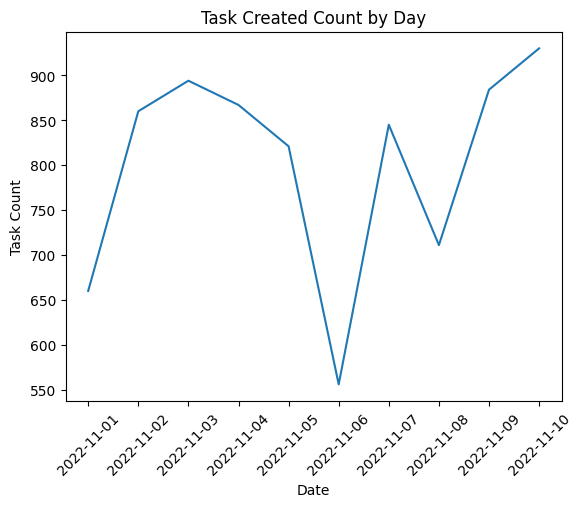

In [28]:
# groupby the taskCreatedTime field by day and count values
daily_count = df_raw_ord7.groupby(df_raw_ord7['taskCreatedTime'].dt.date)['taskCreatedTime'].count()

# plot the data using matplotlib
plt.plot(daily_count.index, daily_count.values)
plt.title('Task Created Count by Day')
plt.xlabel('Date')
plt.ylabel('Task Count')
plt.xticks(rotation=45) # rotate x-axis labels by 45 degrees
plt.xlabel('Date', fontsize=10) # decrease font size of x-axis label
plt.show()

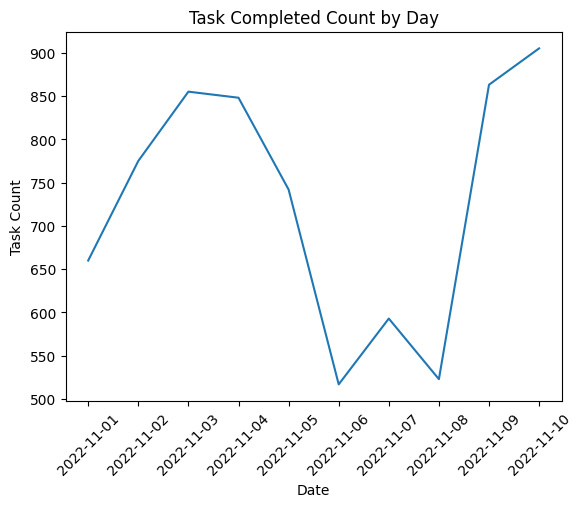

In [29]:
# groupby the taskCompletedTime field by day and count values
daily_count = df_raw_ord7.groupby(df_raw_ord7['taskCompletedTime'].dt.date)['taskCompletedTime'].count()

# plot the data using matplotlib
plt.plot(daily_count.index, daily_count.values)
plt.title('Task Completed Count by Day')
plt.xlabel('Date')
plt.ylabel('Task Count')
plt.xticks(rotation=45) # rotate x-axis labels by 45 degrees
plt.xlabel('Date', fontsize=10) # decrease font size of x-axis label
plt.show()

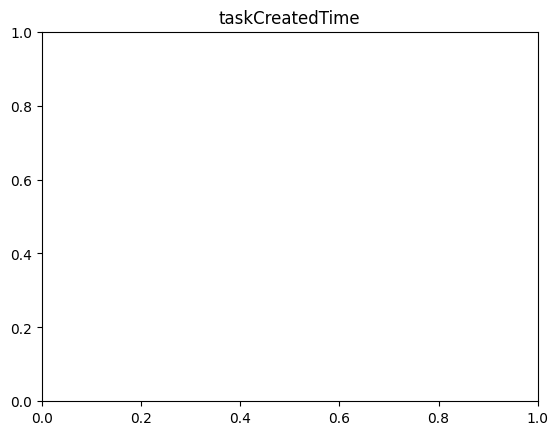

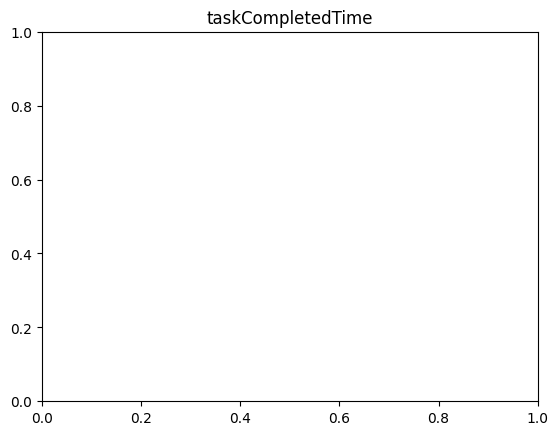

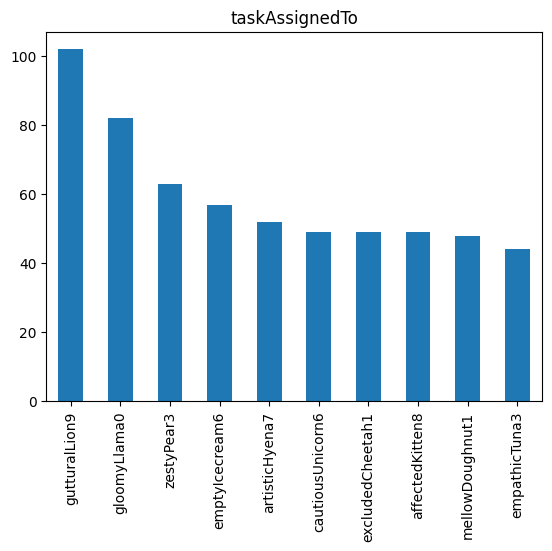

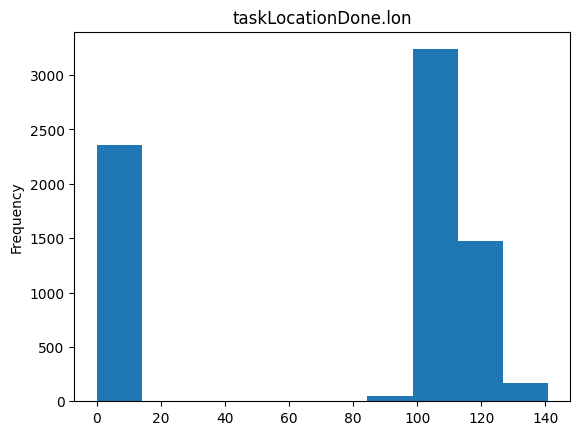

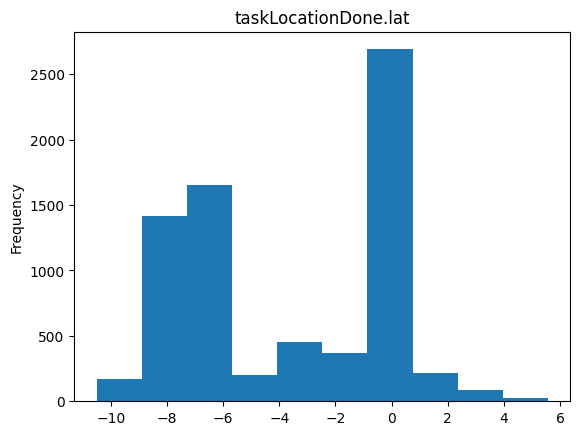

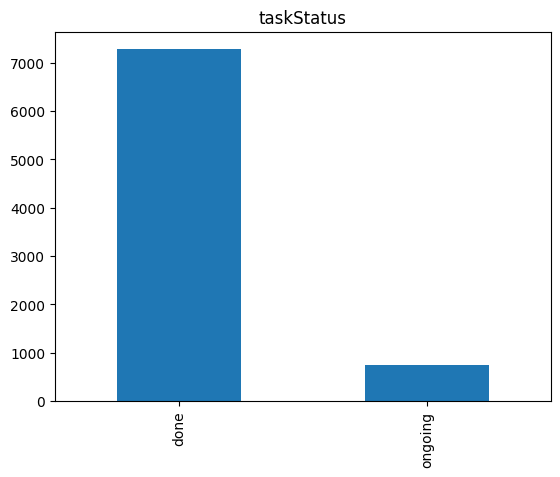

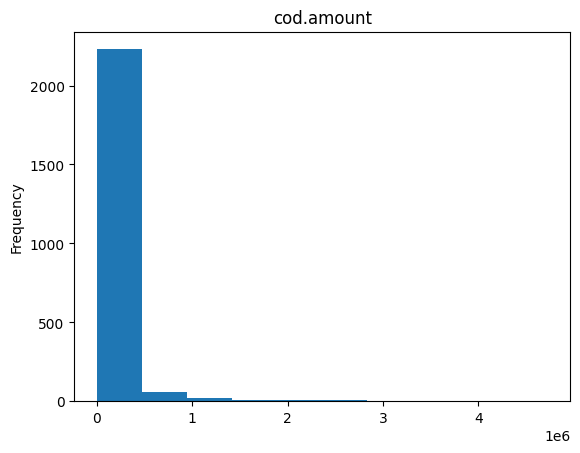

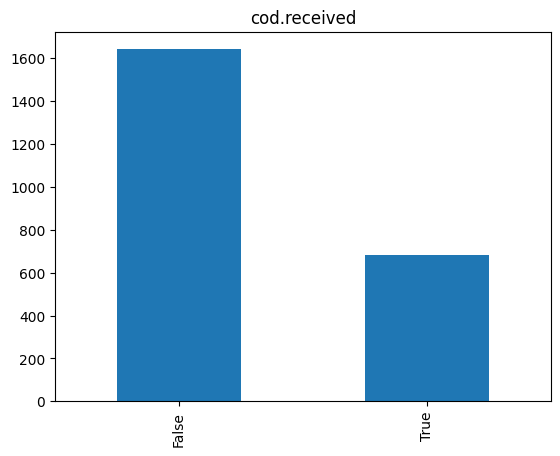

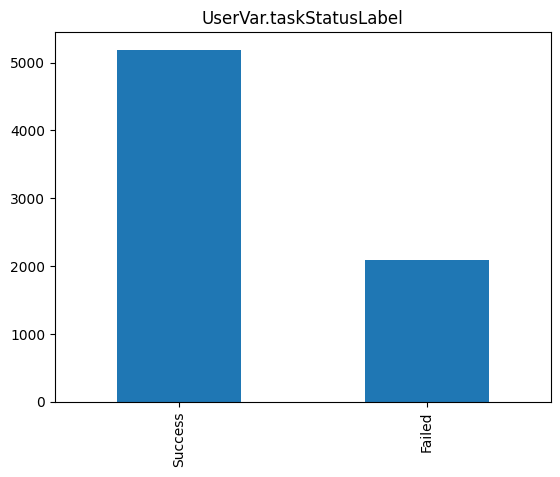

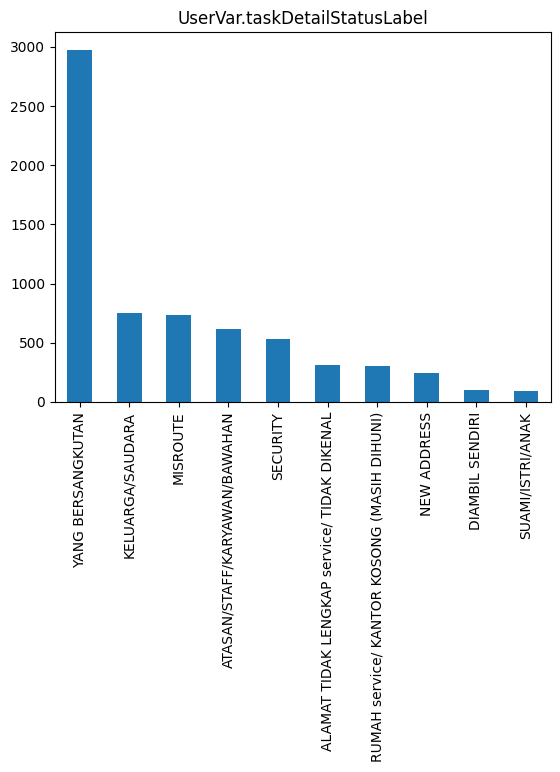

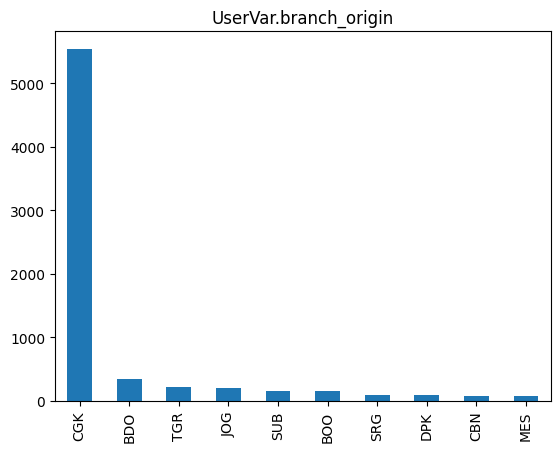

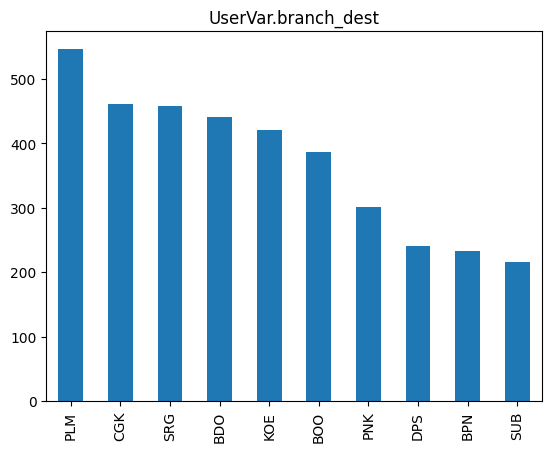

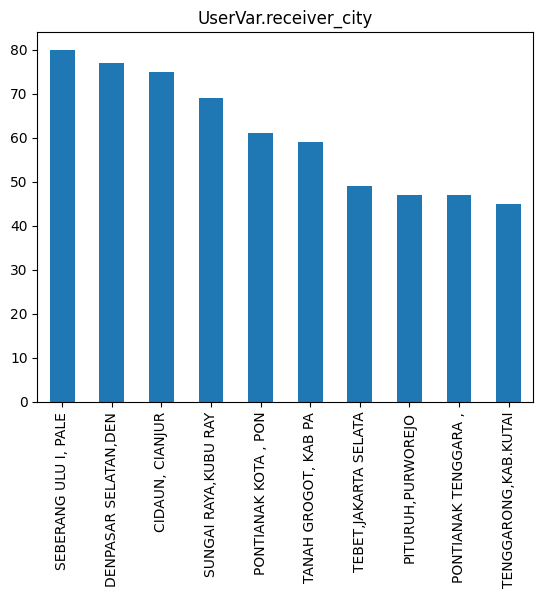

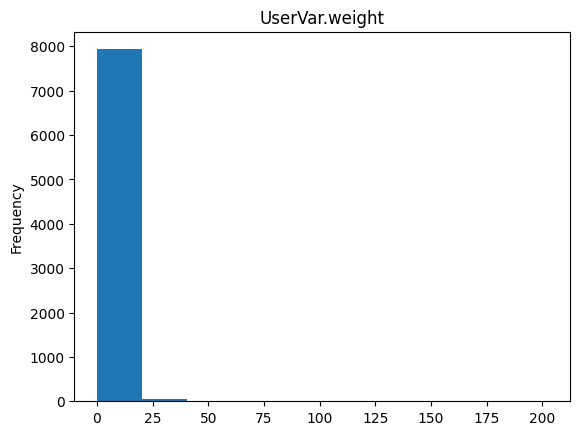

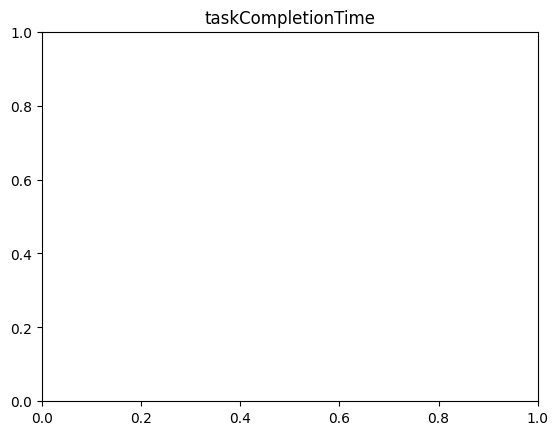

In [30]:
for column in df_raw_ord7:
  plt.figure(column)
  plt.title(column)
  if is_numeric_dtype(df_raw_ord7[column]):
    df_raw_ord7[column].plot(kind='hist')
  elif is_string_dtype(df_raw_ord7[column]):
    df_raw_ord7[column].value_counts()[:10].plot(kind='bar')


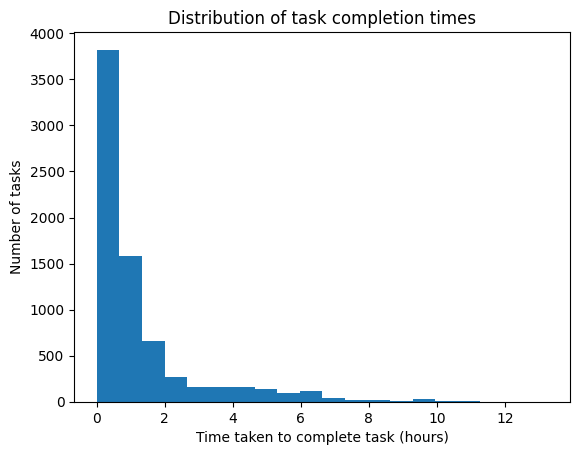

In [31]:
# Convert taskCompletionTime to timedelta format
df_raw_ord7["taskCompletionTime"] = pd.to_timedelta(df_raw_ord7["taskCompletionTime"])

# Create a histogram of taskCompletionTime
plt.hist(df_raw_ord7["taskCompletionTime"].dt.total_seconds() / 3600, bins=20)

# Add labels and title
plt.xlabel("Time taken to complete task (hours)")
plt.ylabel("Number of tasks")
plt.title("Distribution of task completion times")

# Show the plot
plt.show()

Before drawing any conclusions, it's important to verify the accuracy and reliability of the data by double-checking the taskCreatedTime and taskCompletedTime records for any errors or inconsistencies. However, if we are unable to verify the data, we must proceed with caution and make decisions based on the available information.

In [32]:
df = df_raw_ord7.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8332
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   taskCreatedTime                8028 non-null   datetime64[ns, pytz.FixedOffset(420)]
 1   taskCompletedTime              7281 non-null   datetime64[ns, pytz.FixedOffset(420)]
 2   taskAssignedTo                 8028 non-null   object                               
 3   taskLocationDone.lon           7281 non-null   float64                              
 4   taskLocationDone.lat           7281 non-null   float64                              
 5   taskStatus                     8028 non-null   object                               
 6   cod.amount                     2323 non-null   float64                              
 7   cod.received                   2323 non-null   object                         

# Exploratory Data Analysis

## Task Status

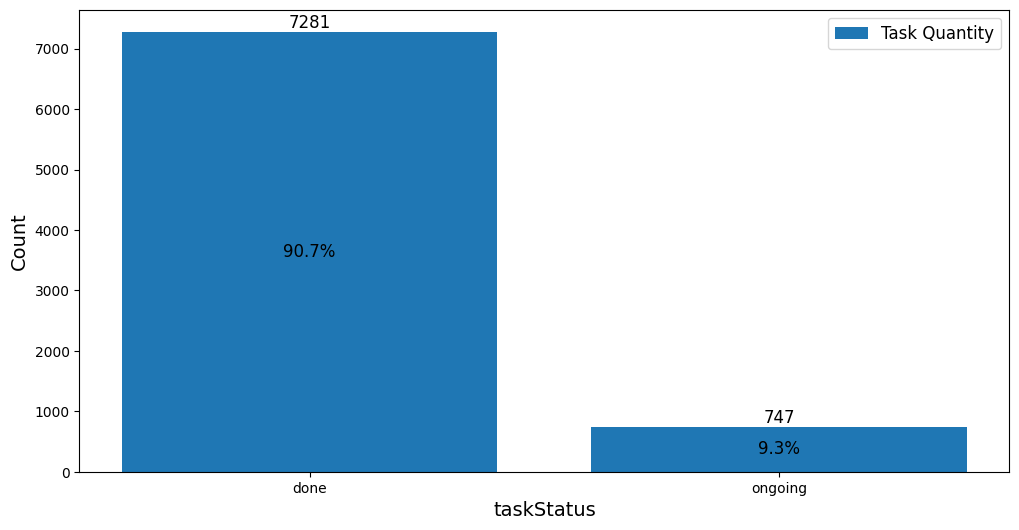

In [33]:
# create the bar chart
plt.figure(figsize=(12, 6))
counts = df['taskStatus'].value_counts()
plt.bar(counts.index, counts)

# add the values and percentages to the chart
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.text(i, v/2, f"{(v/counts.sum()*100):.1f}%", ha='center', va='center', fontsize=12)

# add axis labels and a legend
plt.xlabel('taskStatus', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Task Quantity'], fontsize=12)

# show the chart
plt.show()


Based on the task status, it appears that the majority of tasks have been completed 90.7% (7281) and only a small percentage are ongoing 9.3% (747)

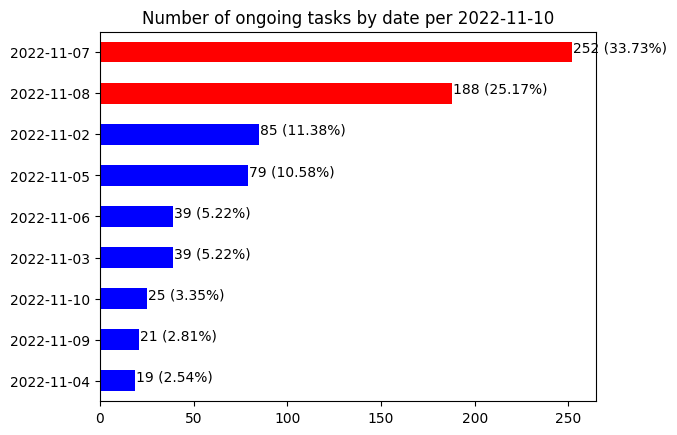

In [34]:
# Filter the DataFrame to include only ongoing tasks
ongoing_tasks = df[df.taskStatus == 'ongoing']

# Count the number of ongoing tasks for each date
task_counts = ongoing_tasks.taskCreatedTime.dt.date.value_counts().sort_values(ascending=True).tail(9)

# Calculate the percentage of tasks for each date
task_percentages = task_counts / task_counts.sum()

# Plot the results in a horizontal bar chart
colors = ['blue'] * 7 + ['red'] * 2
ax = task_counts.plot(kind='barh', color=colors)

# Add the values and percentages to the chart
for i, v in enumerate(task_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(ongoing_tasks)*100:.2f}%)')

# Set the title and show the plot
plt.title(f'Number of ongoing tasks by date per {df.taskCreatedTime.max().date()}')
plt.show()

Let's check the receiver city since a significant portion of the ongoing tasks, 33.73% and 25.17% respectively, originated from November 7th and 8th of 2022 which are not very recent, based on the ongoing status.

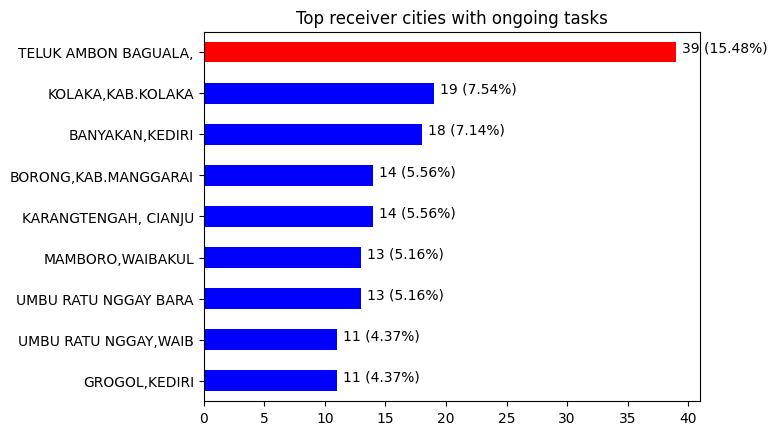

In [35]:
# Filter the DataFrame to include only ongoing tasks on 2022-11-07
import datetime
df_filtered = df[(df.taskStatus == 'ongoing') & (df.taskCreatedTime.dt.date == datetime.date(2022, 11, 7))]

# Get top 9 receiver cities by task count
city_counts = df_filtered['UserVar.receiver_city'].value_counts().sort_values(ascending=True).tail(9)

# Plot the bar chart
colors = ['blue'] * 8 + ['red'] * 1
ax = city_counts.plot(kind='barh', color=colors)

# Add task count and percentage text labels to the bars
for i, v in enumerate(city_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(df_filtered)*100:.2f}%)')

# Set the title and show the plot
plt.title(f'Top receiver cities with ongoing tasks')
plt.show()


On 2022-11-07, the majority of ongoing locations are in Teluk Ambon, which is quite distant from CGK, the most common branch_origin. As a result, there is a possibility of packages arriving late due to limited transportation access and long distances.

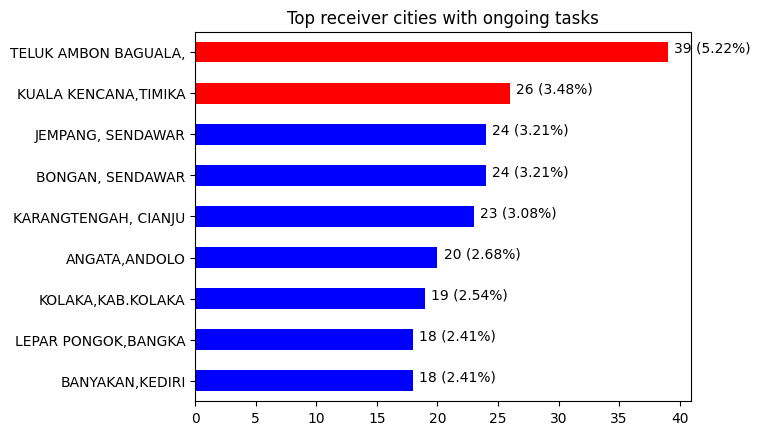

In [36]:
# Filter the DataFrame to include only ongoing tasks
df_filtered = df[(df.taskStatus == 'ongoing')]

# Get top 9 receiver cities by task count
city_counts = df_filtered['UserVar.receiver_city'].value_counts().sort_values(ascending=True).tail(9)

# Plot the bar chart
colors = ['blue'] * 7 + ['red'] * 2
ax = city_counts.plot(kind='barh', color=colors)

# Add task count and percentage text labels to the bars
for i, v in enumerate(city_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(df_filtered)*100:.2f}%)')

# Set the title and show the plot
plt.title(f'Top receiver cities with ongoing tasks')
plt.show()


By filtering out the locations without dates and focusing on the ongoing ones, we can observe that the predominant ongoing tasks are centered around Teluk Ambon and Kuala Kencana in Timika. Consequently, the distance and transportation accessibility can cause delays in package deliveries.

## Failed Delivery Status

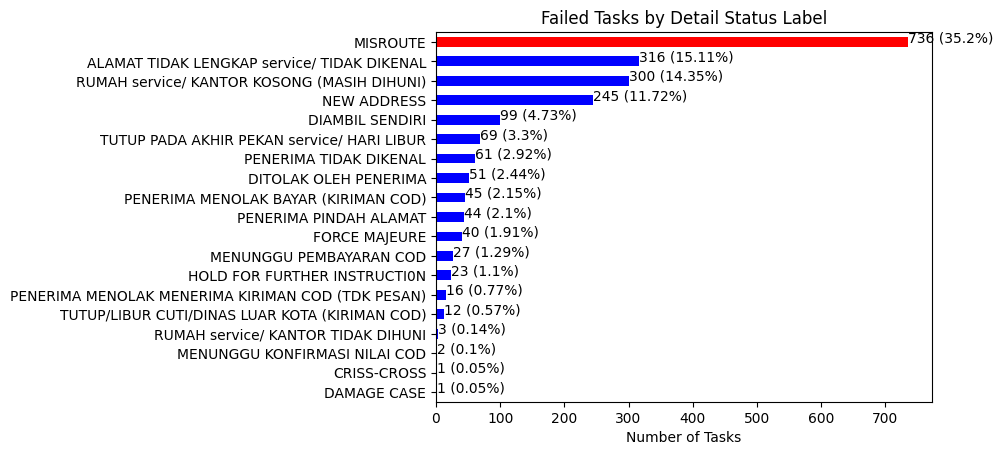

In [37]:
failed_tasks = df[df['UserVar.taskStatusLabel'] == 'Failed']['UserVar.taskDetailStatusLabel'].value_counts().sort_values(ascending=True).tail(20)

if not failed_tasks.empty:
    colors = ['blue'] * (len(failed_tasks) - 1) + ['red'] * 1

    failed_tasks.plot(kind='barh', color=colors)
    plt.title('Failed Tasks by Detail Status Label')
    plt.xlabel('Number of Tasks')

    for i, v in enumerate(failed_tasks.values):
        plt.text(v, i, str(v) + ' (' + str(round(v / sum(failed_tasks.values) * 100, 2)) + '%)')

    plt.show()
else:
    print('No failed tasks found.')


Failed Tasks by Detail Status Label shows that 35.2% task is failed due to MISROUTE

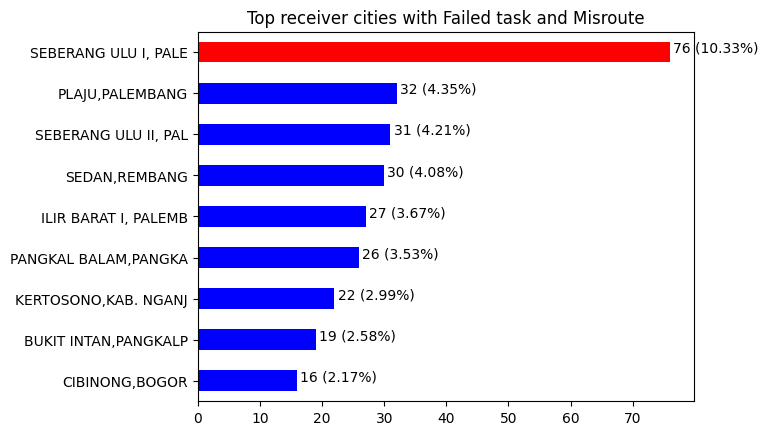

In [38]:
# Filter the DataFrame to include only Misroute
df_filtered = df[df["UserVar.taskDetailStatusLabel"] == "MISROUTE"]

# Get top 9 receiver cities by task count
city_counts = df_filtered['UserVar.receiver_city'].value_counts().sort_values(ascending=True).tail(9)

# Plot the bar chart
colors = ['blue'] * 8 + ['red'] * 1
ax = city_counts.plot(kind='barh', color=colors)

# Add task count and percentage text labels to the bars
for i, v in enumerate(city_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(df_filtered)*100:.2f}%)')

# Set the title and show the plot
plt.title(f'Top receiver cities with Failed task and Misroute')
plt.show()


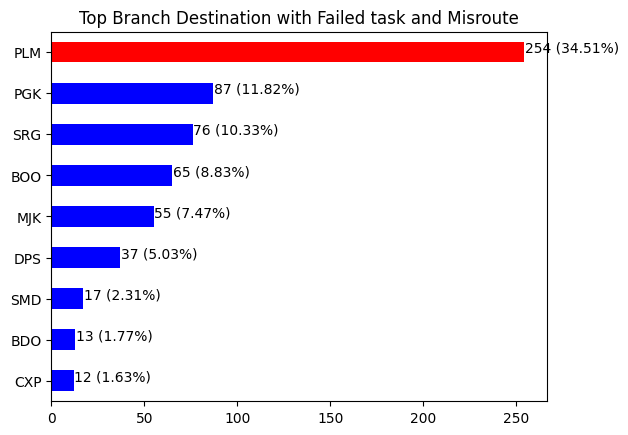

In [39]:
# Filter the DataFrame to include only Misroute
df_filtered = df[df["UserVar.taskDetailStatusLabel"] == "MISROUTE"]

# Get top 9 receiver cities by task count
city_counts = df_filtered['UserVar.branch_dest'].value_counts().sort_values(ascending=True).tail(9)

# Plot the bar chart
colors = ['blue'] * 8 + ['red'] * 1
ax = city_counts.plot(kind='barh', color=colors)

# Add task count and percentage text labels to the bars
for i, v in enumerate(city_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(df_filtered)*100:.2f}%)')

# Set the title and show the plot
plt.title(f'Top Branch Destination with Failed task and Misroute')
plt.show()


MISROUTE occurence most happened in Seberang ULU I, PALE (10.33%) and in PLM branch (34.51%). 

## COD data

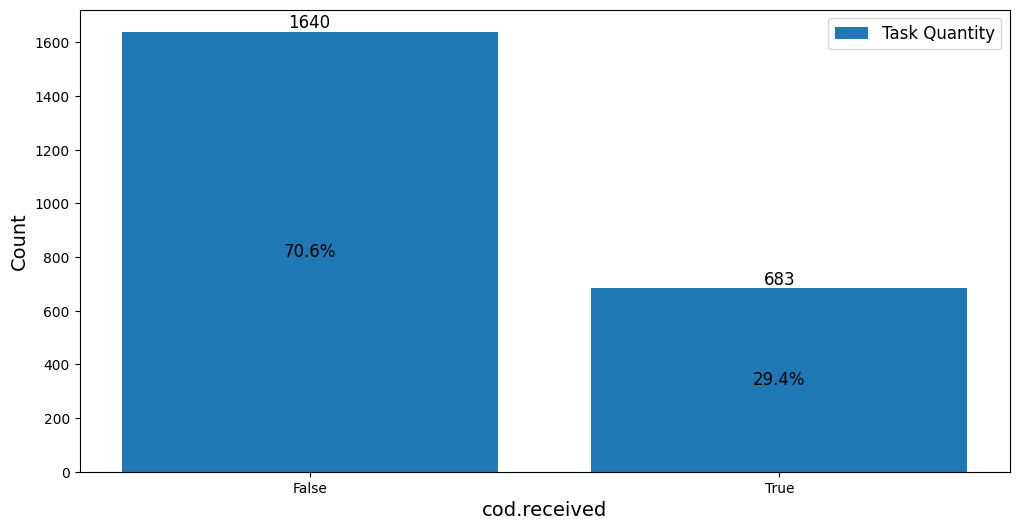

In [40]:
# create the bar chart
plt.figure(figsize=(12, 6))
counts = df['cod.received'].value_counts()
counts.index = counts.index.astype(str) # convert boolean values to strings
plt.bar(counts.index, counts)

# add the values and percentages to the chart
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.text(i, v/2, f"{(v/counts.sum()*100):.1f}%", ha='center', va='center', fontsize=12)

# add axis labels and a legend
plt.xlabel('cod.received', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Task Quantity'], fontsize=12)

# show the chart
plt.show()


More than 70% COD isn't received by 
package recipient.

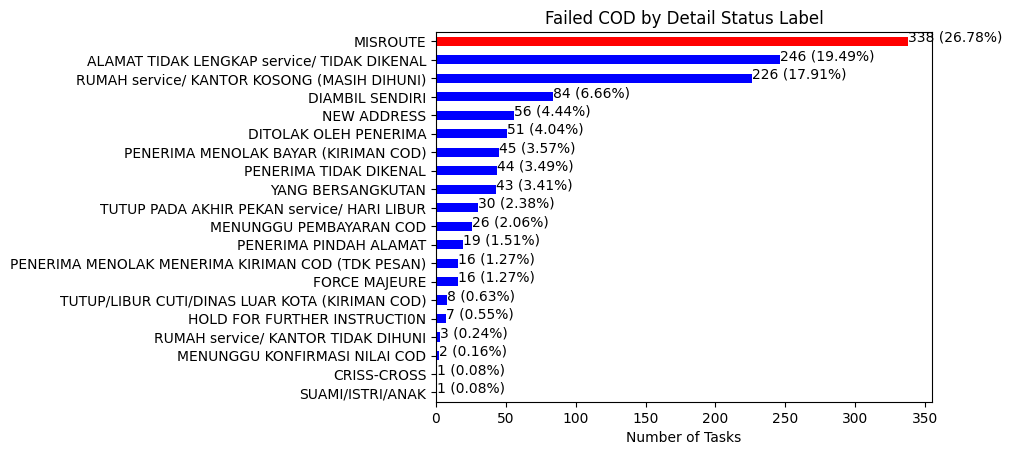

In [41]:
failed_tasks = df[df['cod.received'] == False]['UserVar.taskDetailStatusLabel'].value_counts().sort_values(ascending=True).tail(20)

if not failed_tasks.empty:
    colors = ['blue'] * (len(failed_tasks) - 1) + ['red'] * 1

    failed_tasks.plot(kind='barh', color=colors)
    plt.title('Failed COD by Detail Status Label')
    plt.xlabel('Number of Tasks')

    for i, v in enumerate(failed_tasks.values):
        plt.text(v, i, str(v) + ' (' + str(round(v / sum(failed_tasks.values) * 100, 2)) + '%)')

    plt.show()
else:
    print('No failed tasks found.')


Same like Failed Tasks, most Failed COD  task (26.78%) is failed due to MISROUTE

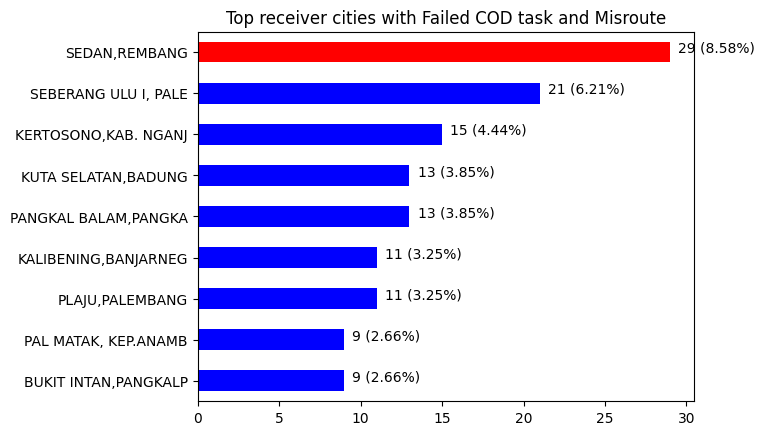

In [42]:
# Filter the DataFrame to include only Misroute and failed COD tasks
df_filtered = df[(df["UserVar.taskDetailStatusLabel"] == "MISROUTE") & (df['cod.received'] == False)]

# Get top 9 receiver cities by task count
city_counts = df_filtered['UserVar.receiver_city'].value_counts().sort_values(ascending=True).tail(9)

# Plot the bar chart
colors = ['blue'] * 8 + ['red'] * 1
ax = city_counts.plot(kind='barh', color=colors)

# Add task count and percentage text labels to the bars
for i, v in enumerate(city_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(df_filtered)*100:.2f}%)')

# Set the title and show the plot
ax.set_title('Top receiver cities with Failed COD task and Misroute')
plt.show()


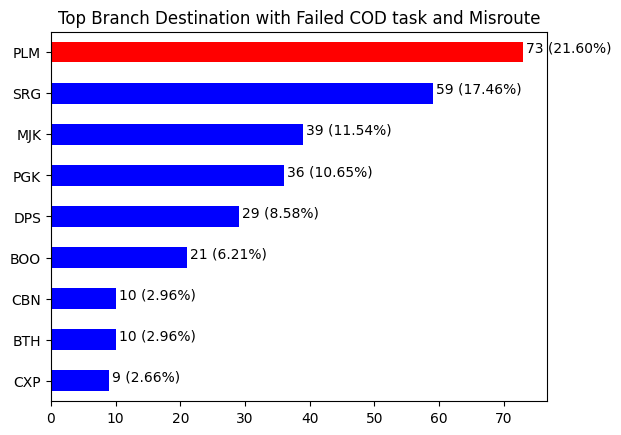

In [43]:
# Filter the DataFrame to include only Misroute
df_filtered = df[(df["UserVar.taskDetailStatusLabel"] == "MISROUTE") & (df['cod.received'] == False)]

# Get top 9 receiver cities by task count
city_counts = df_filtered['UserVar.branch_dest'].value_counts().sort_values(ascending=True).tail(9)

# Plot the bar chart
colors = ['blue'] * 8 + ['red'] * 1
ax = city_counts.plot(kind='barh', color=colors)

# Add task count and percentage text labels to the bars
for i, v in enumerate(city_counts):
    ax.text(v + 0.5, i, f'{v} ({v/len(df_filtered)*100:.2f}%)')

# Set the title and show the plot
plt.title(f'Top Branch Destination with Failed COD task and Misroute')
plt.show()


COD MISROUTE occurence most happened in Sedan, Rembang (8.58%) and in PLM branch (21.60%).

# Machine Learning

As the PLM branch has the highest number of misroutes, our objective will be to develop a strategy for predicting the optimal routes for this branch.

In [44]:
PLM_df1 = df[(df["UserVar.branch_dest"] == "PLM") & (df["taskLocationDone.lon"] != 0) & (~np.isnan(df["taskLocationDone.lon"]))]
taskCreatedTime_counts = PLM_df1.groupby(PLM_df1['taskCreatedTime'].dt.date).size()
taskCompletedTime_counts = PLM_df1.groupby(PLM_df1['taskCompletedTime'].dt.date).size()
print(taskCreatedTime_counts)

taskCreatedTime
2022-11-01     1
2022-11-02    54
2022-11-03    62
2022-11-04     7
2022-11-05     7
2022-11-06    22
2022-11-07     6
2022-11-08     6
2022-11-09     4
2022-11-10     8
dtype: int64


Let's use the recent date

In [45]:
PLM_df = df[(df["UserVar.branch_dest"] == "PLM") & 
            (df["taskLocationDone.lon"] != 0) & 
            (~np.isnan(df["taskLocationDone.lon"])) & 
            (pd.to_datetime(df["taskCreatedTime"]).dt.date == pd.to_datetime('2022-11-10').date())]

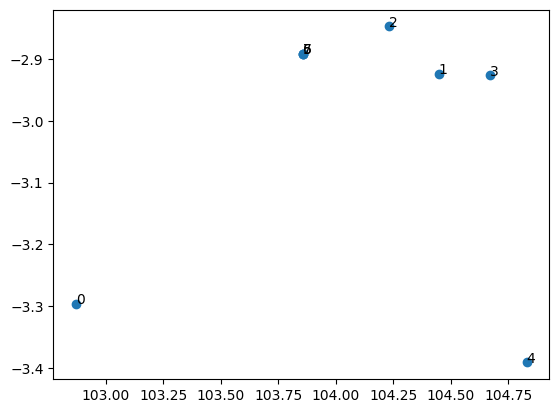

In [46]:
city_coords = dict(zip(range(len(PLM_df)), zip(PLM_df.iloc[:, 3].values, PLM_df.iloc[:, 4].values)))

# Define the number of cities
num_cities = len(city_coords)

# Plot the cities on a 2D plane
x_coords = [city_coords[i][0] for i in range(num_cities)]
y_coords = [city_coords[i][1] for i in range(num_cities)]
plt.scatter(x_coords, y_coords)


for i in range(num_cities):
    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.show()

Modelling

In [49]:
import pulp
import itertools 
import math

def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

# Define the TSP problem
prob = pulp.LpProblem("TSP", pulp.LpMinimize)

# Define the binary decision variables
x = pulp.LpVariable.dicts("x", [(i, j) for i in city_coords for j in city_coords if i != j], cat='Binary') 

# Define the objective function
prob += pulp.lpSum([distance(city_coords[i], city_coords[j]) * x[(i, j)] for i in city_coords for j in city_coords if i != j])

# Define the constraints
# Each city must be visited exactly once
for i in city_coords:
    prob += pulp.lpSum([x[(i, j)] for j in city_coords if i != j]) == 1
    prob += pulp.lpSum([x[(j, i)] for j in city_coords if i != j]) == 1

# Subtour elimination constraints
for k in city_coords:
    for S in range(2, len(city_coords)):
        for subset in itertools.combinations([i for i in city_coords if i != k], S):
            prob += pulp.lpSum([x[(i, j)] for i in subset for j in subset if i != j]) <= len(subset) - 1

Solving the Route

In [50]:
# Solve the problem using the CBC solver
prob.solve(pulp.PULP_CBC_CMD())

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal objective value
print("Total distance traveled:", pulp.value(prob.objective)) 

Status: Optimal
Total distance traveled: 4.350851211959792


Extracting the Solution

Route:
0 -> 7
7 -> 5
5 -> 6
6 -> 2
2 -> 1
1 -> 3
3 -> 4
4 -> 0


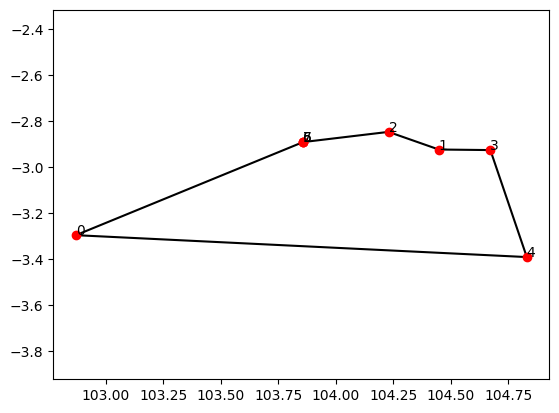

In [51]:
# Extract the solution 
solution = []
start_city = 0
next_city = start_city
while True:
    for j in range(num_cities):
        if j != next_city and x[(next_city, j)].value() == 1:
            solution.append((next_city, j))
            next_city = j
            break
    if next_city == start_city:
        break

# Print the solution
print("Route:")
for i in range(len(solution)):
    print(str(solution[i][0]) + " -> " + str(solution[i][1]))

# Plot the solution on a 2D plane
for i in range(len(solution)):
    plt.plot([city_coords[solution[i][0]][0], city_coords[solution[i][1]][0]], [city_coords[solution[i][0]][1], city_coords[solution[i][1]][1]], 'k-')
for i in range(num_cities):
    plt.plot(city_coords[i][0], city_coords[i][1], 'ro')

    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.axis('equal')
plt.show()

In this project, we have successfully demonstrated the utilization of PuLP in Python to model and solve the Misroutes. Our approach employed the CBC solver to achieve the optimal solution, which we subsequently visualized using Matplotlib. However, it is worth noting that the TSP is classified as an NP-hard problem. This classification implies that the algorithm's runtime increases exponentially with the number of cities. As such, our approach is best suited for small to medium-sized instances of the problem. For larger instances, specialized algorithms and heuristics should be employed to ensure practicality.